In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
import visualize_clf
import prepare
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24
          }
pylab.rcParams.update(params)

In [17]:
dataset = pd.read_csv("virus_data.csv")
training_set, test_set = sklearn.model_selection.train_test_split(dataset,test_size = 0.2, random_state = 53)

train_df_prepared = prepare.prepare_data(training_set, training_set)
test_df_prepared = prepare.prepare_data(training_set, test_set)


C:\Users\97254\OneDrive\Desktop\Major2_ML\prepare.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.df = self.df.drop('blood_type', 1)
C:\Users\97254\OneDrive\Desktop\Major2_ML\prepare.py:38: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.df = self.df.drop('pcr_date', 1)
C:\Users\97254\OneDrive\Desktop\Major2_ML\prepare.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.df = self.df.drop('symptoms', 1)
C:\Users\97254\OneDrive\Desktop\Major2_ML\prepare.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.df = self.df.drop('current_location', 1)
C:\Users\97254\OneDrive\Desktop\Major2_ML\prepare.py:41: FutureWarning: In a f

Text(0.5, 0.98, 'jointplot PCR_01 PCR_02')

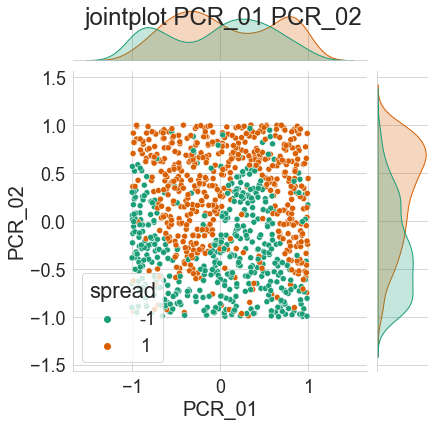

In [18]:
#(Q1)
tmp_df = train_df_prepared[["spread", "PCR_01", "PCR_02"]]
p_PCR01_PCR02 = sns.jointplot(data=tmp_df, x='PCR_01', y='PCR_02', hue='spread', palette = "Dark2")
p_PCR01_PCR02.fig.suptitle("jointplot PCR_01 PCR_02")

In [19]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
        Y = (Y + 1) // 2
        labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

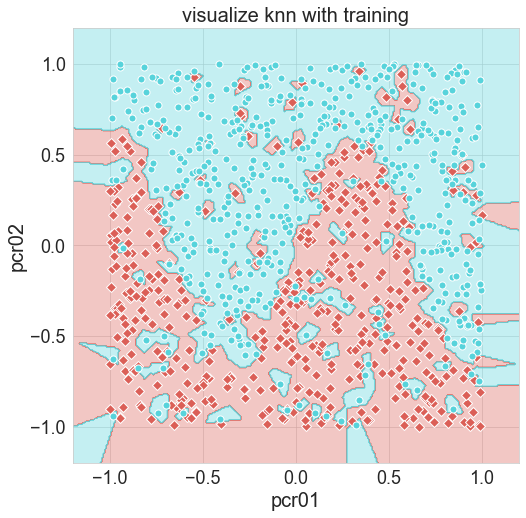

In [20]:
#(Q2)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
df_features = pd.DataFrame(train_df_prepared[['PCR_01', 'PCR_02']]).to_numpy()
df_labels = pd.DataFrame(train_df_prepared[['spread']]).to_numpy()
knn.fit(df_features, np.ravel(df_labels))
visualize_clf(knn, df_features, df_labels, 'visualize knn with training', 'pcr01', 'pcr02')

C:\Users\97254\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\97254\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\97254\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\97254\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

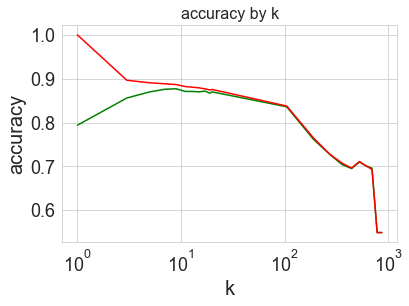

In [21]:
#(Q3)
mean_validations = []
mean_training = []
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))
df_features = train_df_prepared[["PCR_01","PCR_02"]];
df_labels = train_df_prepared[["spread"]];
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn,df_features ,df_labels, cv=8, return_train_score=True)
    mean_validations.append(np.mean(cv_results['test_score']))
    mean_training.append(np.mean(cv_results['train_score']))
fig = plt.figure(1)
plt.title("accuracy by k", fontsize='16')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.semilogx(k_values, mean_validations, color = "green", label = "validation accuracy")
plt.semilogx(k_values, mean_training, color = "red", label = "train accuracy")

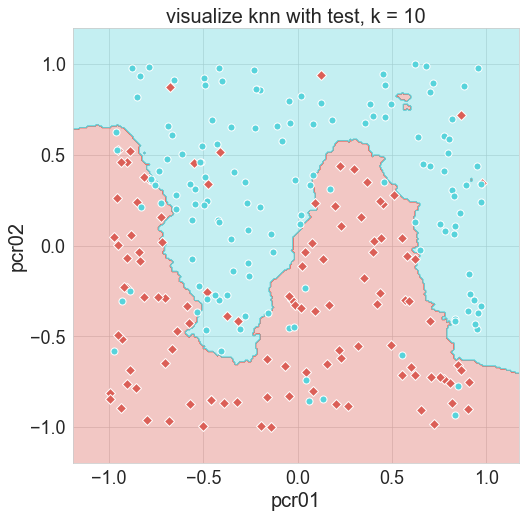

0.864

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
df_test_features = pd.DataFrame(test_df_prepared[['PCR_01', 'PCR_02']]).to_numpy()
df_test_labels = pd.DataFrame(test_df_prepared[['spread']]).to_numpy()
knn.fit(df_features, np.ravel(df_labels))
visualize_clf(knn, df_test_features, df_test_labels, 'visualize knn with test, k = 10', 'pcr01', 'pcr02')
knn.score(df_test_features, df_test_labels)

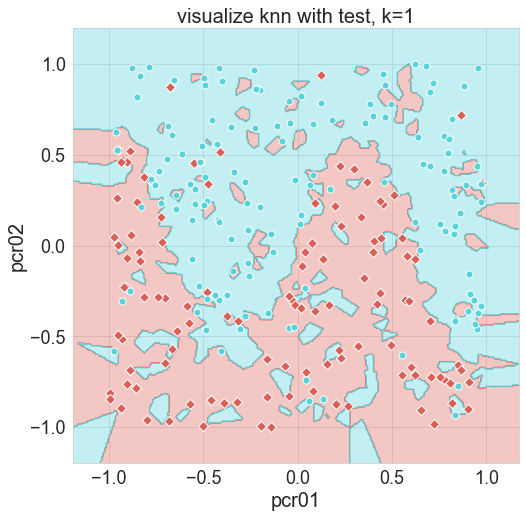

0.808

In [23]:
#(Q5 - k = 1)
knn = KNeighborsClassifier(n_neighbors=1)
df_test_features = pd.DataFrame(test_df_prepared[['PCR_01', 'PCR_02']]).to_numpy()
df_test_labels = pd.DataFrame(test_df_prepared[['spread']]).to_numpy()
knn.fit(df_features, np.ravel(df_labels))
visualize_clf(knn, df_test_features, df_test_labels, 'visualize knn with test, k=1', 'pcr01', 'pcr02')
knn.score(df_test_features, df_test_labels)

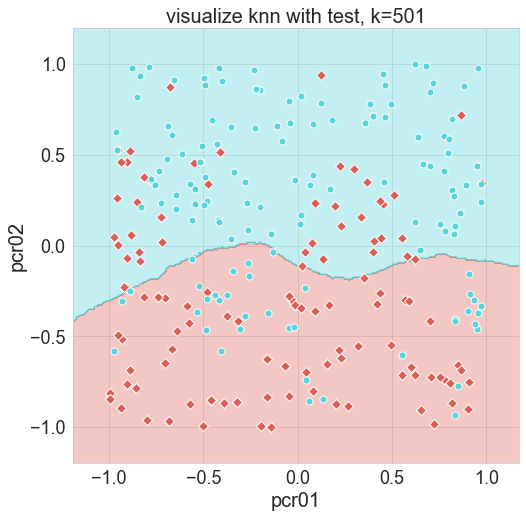

0.668

In [25]:
#(Q5 - k = 501)
knn = KNeighborsClassifier(n_neighbors=501)
df_test_features = pd.DataFrame(test_df_prepared[['PCR_01', 'PCR_02']]).to_numpy()
df_test_labels = pd.DataFrame(test_df_prepared[['spread']]).to_numpy()
knn.fit(df_features, np.ravel(df_labels))
visualize_clf(knn, df_test_features, df_test_labels, 'visualize knn with test, k=501', 'pcr01', 'pcr02')
knn.score(df_test_features, df_test_labels)

C:\Users\yeela\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yeela\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yeela\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\yeela\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

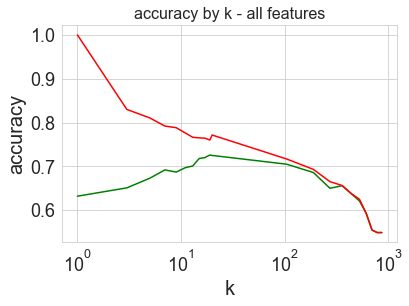

In [56]:
#(Q6)
mean_validations = []
mean_training = []
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))
df_features = train_df_prepared.drop(["spread","risk"],1)
df_labels = train_df_prepared[["spread"]]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn,df_features ,df_labels, cv=8, return_train_score=True)
    mean_validations.append(np.mean(cv_results['test_score']))
    mean_training.append(np.mean(cv_results['train_score']))
fig = plt.figure(1)
plt.title("accuracy by k - all features", fontsize='16')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.semilogx(k_values, mean_validations, color = "green", label = "validation accuracy")
plt.semilogx(k_values, mean_training, color = "red", label = "train accuracy")

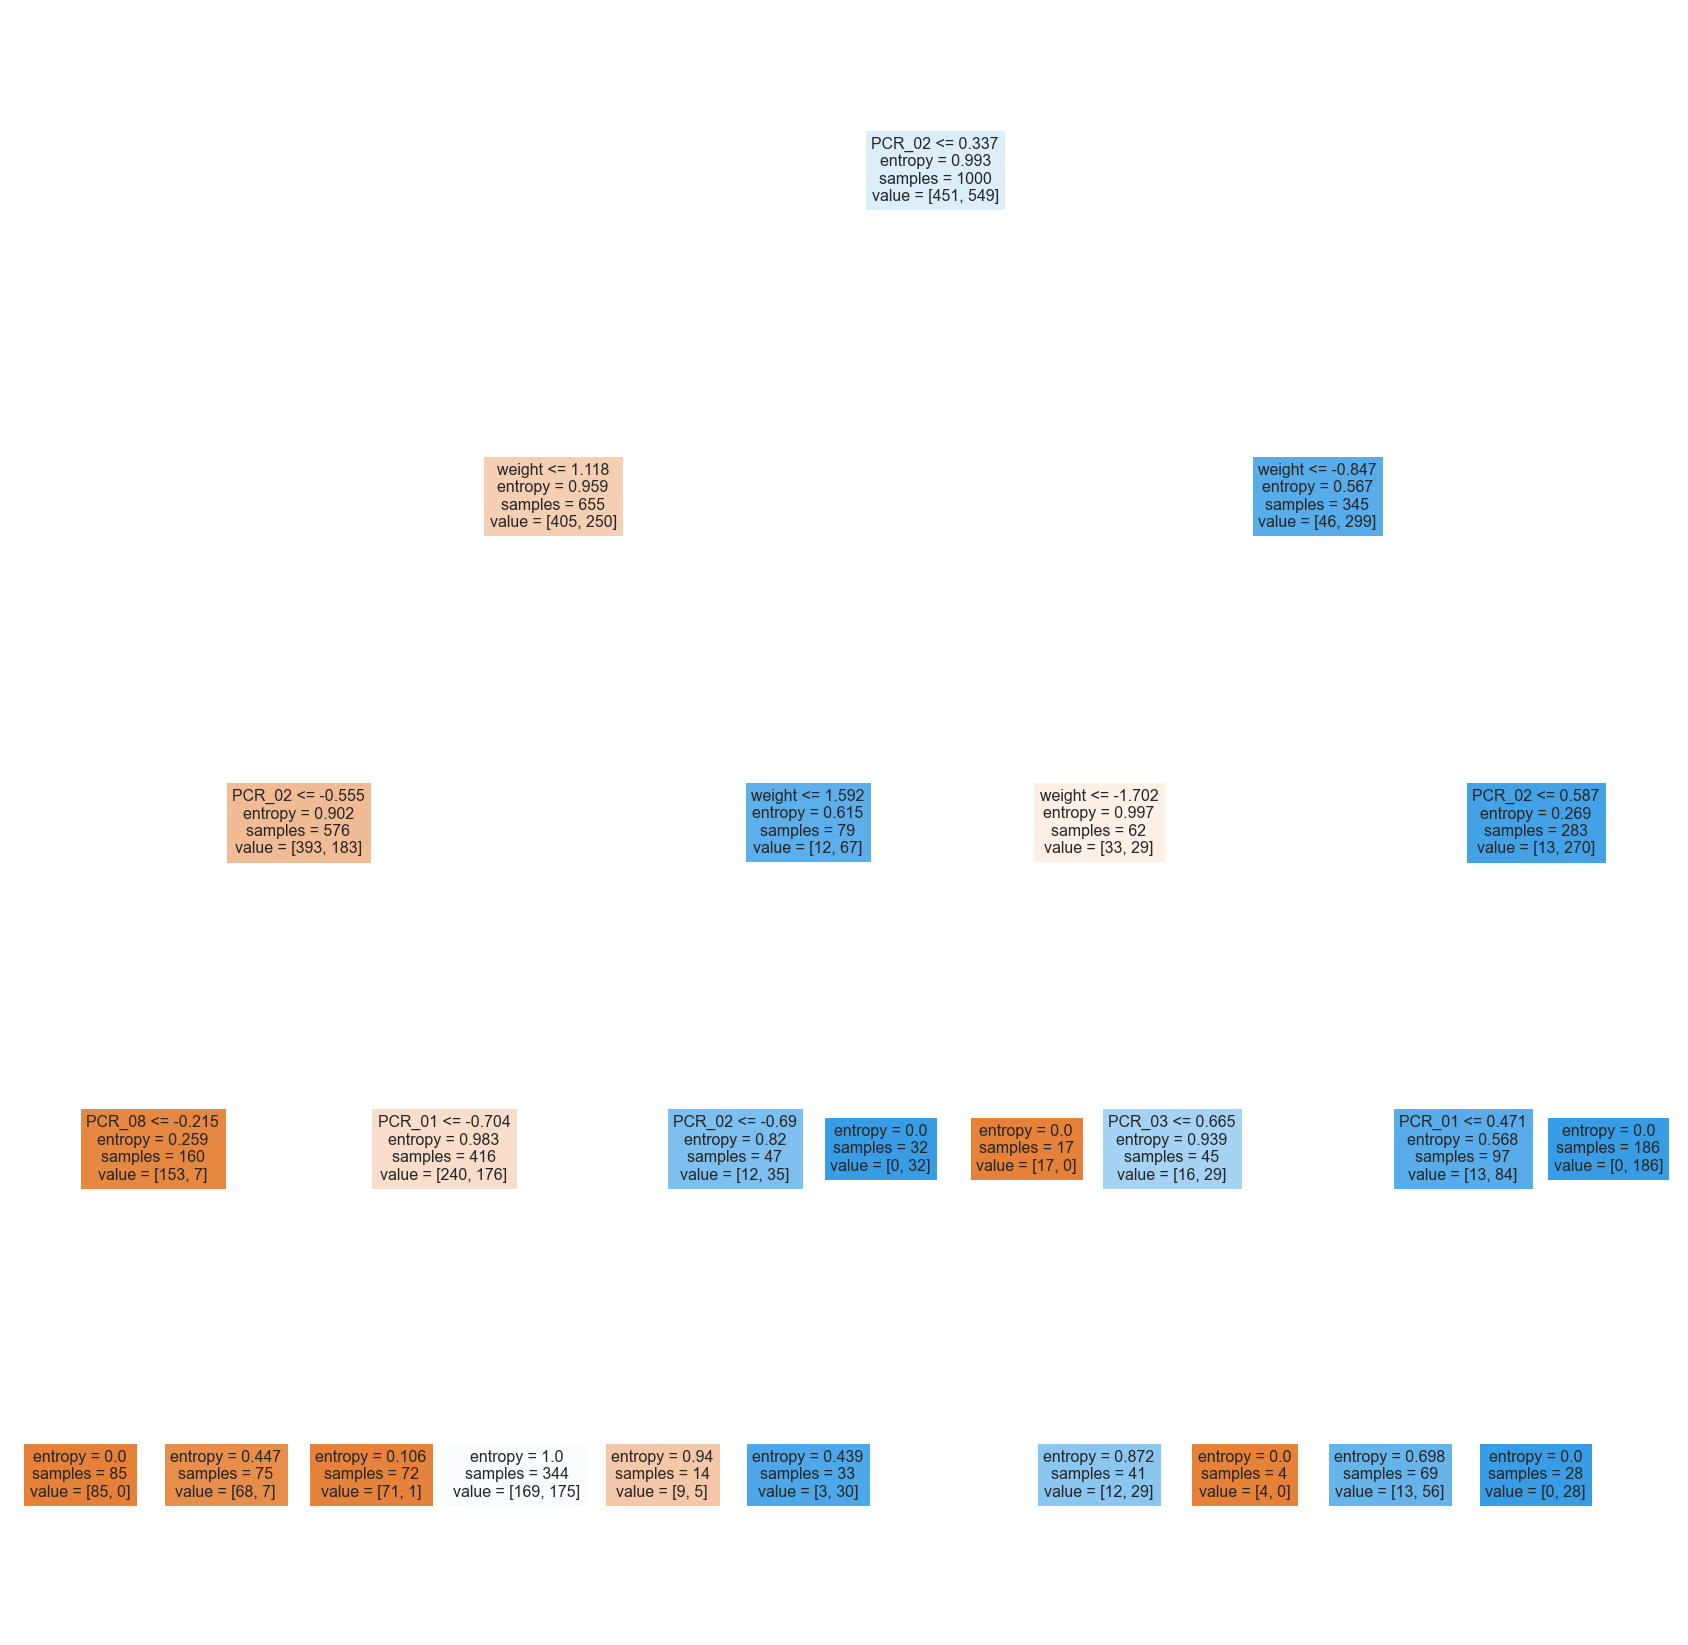

In [73]:
#(Q7)
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dec_tree.fit(df_features, df_labels)
dec_tree.score(df_features, df_labels)
fig = plt.figure(figsize=(30, 30))
_ = plot_tree(dec_tree, filled = True, feature_names=list(df_features.columns))